In [25]:
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
from keras import optimizers
from keras import models
from keras import layers
import numpy as np 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.models import Sequential, Model
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import glob
import skimage.io as io
import skimage.transform as trans
from keras.layers import Input


In [51]:
def myGenerator(train_generator):
    while True:
        xy = train_generator.next() #or next(train_generator)
        yield (xy)

Found 36 images belonging to 1 classes.
Epoch 1/10
1/1 [==============================] - 0s 214ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 191ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 194ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 201ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 199ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 197ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 182ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 188ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 181ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 181ms/step - loss: 1.1921e-07 - a

In [58]:
from keras.applications.inception_v3 import InceptionV3
import keras.applications
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K


# this could also be the output a different Keras model or layer
# this assumes K.image_data_format() == 'channels_last'

base_model = keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(1, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

219062272/219055592 [==============================] - 108s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1122 (Conv2D)            (None, None, None, 3 864         input_13[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1122 (Batch (None, None, None, 3 96          conv2d_1122[0][0]                
__________________________________________________________________________________________________
activation_1121 (Activation)    (None, None, None, 3 0           batch_normalization_1122[0][0]   
________________________________________

__________________________________________________________________________________________________
conv2d_1277 (Conv2D)            (None, None, None, 1 215040      activation_1275[0][0]            
__________________________________________________________________________________________________
batch_normalization_1274 (Batch (None, None, None, 1 576         conv2d_1274[0][0]                
__________________________________________________________________________________________________
batch_normalization_1277 (Batch (None, None, None, 1 576         conv2d_1277[0][0]                
__________________________________________________________________________________________________
activation_1273 (Activation)    (None, None, None, 1 0           batch_normalization_1274[0][0]   
__________________________________________________________________________________________________
activation_1276 (Activation)    (None, None, None, 1 0           batch_normalization_1277[0][0]   
__________

In [60]:
train_datagen = ImageDataGenerator(
        rescale=1./255.0,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_images_generator = train_datagen.flow_from_directory(
        '/home/lixing/git/A1_New/data/train/image',
        target_size=(299,299),
        batch_size=5,
        color_mode="rgb",
)
myImage = myGenerator(train_images_generator)
history = model.fit_generator(
        train_images_generator,
        steps_per_epoch=1,
        epochs=10
)

Found 36 images belonging to 1 classes.
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 326ms/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 1.1921e-07 - acc: 1.0000


In [39]:
img = image.load_img('/home/lixing/git/A1_New/data/train/label/sub_label/mask-img-1153828723.02-0.png', target_size=(299, 299))
x = image.img_to_array(img)
x.shape

(299, 299, 3)

Epoch 1/10


ValueError: Output of generator should be a tuple `(x, y, sample_weight)` or `(x, y)`. Found: [[[[0.09255537 0.12266044 0.11059638]
   [0.09211694 0.11414582 0.10188094]
   [0.08831389 0.10483804 0.0884449 ]
   ...
   [0.17484668 0.14739569 0.18032303]
   [0.1796998  0.15224881 0.18638945]
   [0.18431373 0.15686275 0.19215688]]

  [[0.07658575 0.09667808 0.08771732]
   [0.07843138 0.09019608 0.07450981]
   [0.07843138 0.08958739 0.07329243]
   ...
   [0.18431373 0.15686275 0.19215688]
   [0.18431373 0.15686275 0.19215688]
   [0.18536796 0.15686275 0.19250828]]

  [[0.07624226 0.09498388 0.08714075]
   [0.07334088 0.08749364 0.07290291]
   [0.06924464 0.08330603 0.06761976]
   ...
   [0.19072783 0.15686275 0.1942949 ]
   [0.19436766 0.15686275 0.19550818]
   [0.19543542 0.15621974 0.19414939]]

  ...

  [[0.0509804  0.06666667 0.09019608]
   [0.0509804  0.06666667 0.09019608]
   [0.0509804  0.06666667 0.09019608]
   ...
   [0.08462556 0.12776282 0.14401725]
   [0.08235294 0.1254902  0.14117648]
   [0.08949719 0.13263445 0.14117648]]

  [[0.0509804  0.06666667 0.09019608]
   [0.0509804  0.06666667 0.09019608]
   [0.0509804  0.06666667 0.09019608]
   ...
   [0.0896504  0.13278766 0.1502983 ]
   [0.08235294 0.1254902  0.14117648]
   [0.08698477 0.13012202 0.14117648]]

  [[0.0509804  0.06666667 0.09019608]
   [0.0509804  0.06666667 0.09019608]
   [0.0509804  0.06666667 0.09019608]
   ...
   [0.09467524 0.13781248 0.15657935]
   [0.08235294 0.1254902  0.14117648]
   [0.08447236 0.12760961 0.14117648]]]]

(480, 640, 3)
921600
float32
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


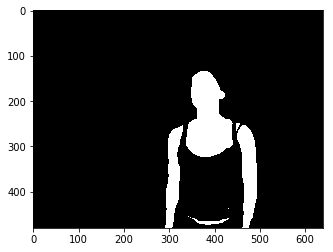

In [28]:
image = plt.imread('/home/lixing/git/A1_New/data/train/label/sub_label/mask-img-1153828723.02-0.png')
print(image.shape) # (h,w,c)
print(image.size)
print(image.dtype) 
print(image)
plt.imshow(image)
plt.show()

In [34]:
base_model = InceptionV3(weights='imagenet', include_top=False)
base_model.summary()

87916544/87910968 [==============================] - 39s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_558 (Conv2D)             (None, None, None, 3 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_558 (BatchN (None, None, None, 3 96          conv2d_558[0][0]                 
__________________________________________________________________________________________________
activation_557 (Activation)     (None, None, None, 3 0           batch_normalization_558[0][0]    
___________________________________________